## Data preprocessing

The same old boring preprocessings..These should come by default actually that's real AI progress.

In [2]:
import pandas as pd

dataset=pd.read_csv('titanic.csv')

dataset.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'],axis='columns',inplace=True)

dataset.fillna(dataset.mean(), inplace=True)

inputs=dataset.drop('Survived',axis='columns')
target=dataset['Survived']

from sklearn.preprocessing import LabelEncoder
le_sex=LabelEncoder()
inputs['sex']=le_sex.fit_transform(inputs['Sex'])
inputs=inputs.drop(['Sex'],axis='columns')
inputs.head()

,Pclass,Age,Fare,sex
0,3,22.0,7.2500,1
1,1,38.0,71.2833,0
2,3,26.0,7.9250,0
3,1,35.0,53.1000,0
4,3,35.0,8.0500,1


## Model Evaluation

Here we will evaluate so many models one by one...to begin with let's start with our generic Decision tree classifier..Real basic stuff.

In [3]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(inputs,target,test_size=0.2,random_state=0)

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import time

model=DecisionTreeClassifier()
start=time.time()
model.fit(x_train,y_train)
stop=time.time()

y_pred=model.predict(x_test)
print("Time taken is : "+str((stop-start)*100)+" ms")
print("Accuracy of this model on the test set is : "+str(accuracy_score(y_test,y_pred)*100)+" %")

Time taken is : 0.30024051666259766 ms
Accuracy of this model on the test set is : 81.00558659217877 %


Here we have the Adaboost model...More info about Adaboost can be obtained from the README. peace \/

In [5]:
from sklearn.ensemble import AdaBoostClassifier
AdaBoost = AdaBoostClassifier(base_estimator= model,n_estimators=400,learning_rate=1)
AdaBoost.fit(x_train,y_train)
prediction = AdaBoost.score(x_test,y_test)
print('The accuracy is: ',prediction*100,'%')

The accuracy is:  82.12290502793296 %


In [6]:
AdaBoost1 = AdaBoostClassifier(n_estimators=400,learning_rate=1,algorithm='SAMME')
AdaBoost1.fit(x_train,y_train)
prediction = AdaBoost1.score(x_test,y_test)
print('The accuracy is: ',prediction*100,'%')

The accuracy is:  83.24022346368714 %


Here we are using the Gradient Boosting..again more info in the README...These are basically all boosting methods usually used to boost your model which will in turn  boost your results in competitions.

In [12]:
from sklearn.ensemble import GradientBoostingClassifier
papa_model=GradientBoostingClassifier()

papa_model.fit(x_train,y_train)
prediction1 = papa_model.score(x_test,y_test)
print('The accuracy is: ',prediction1*100,'%')

The accuracy is:  83.24022346368714 %


XGBoosting is like papa of the papa model so i decided to name it the grandpa model..This is like real ninja stuff about which you can definitely read about in the README where i have copy pasted stuff from various resources crawling around the internet and putting everything in one place so that your work gets easier. You can also visualize the model from the xgboost python API.

The accuracy is:  82.68156424581005 %


C:\Users\User\Anaconda3\Anaconda\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


<IPython.core.display.Javascript object>


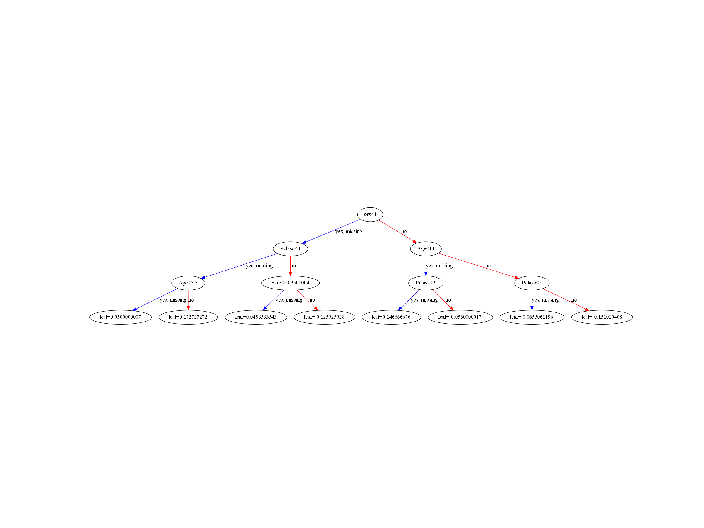

In [17]:
from xgboost import XGBClassifier
from xgboost import plot_tree
import matplotlib.pyplot as plt

grandpa_model = XGBClassifier()
grandpa_model.fit(x_train,y_train)

prediction2 = grandpa_model.score(x_test,y_test)
print('The accuracy is: ',prediction2*100,'%')
# plot single tree
plot_tree(grandpa_model)
plt.show()